## Random Forest Regression

Train Metrics:
MAE: 12590241.222821543
MSE: 996967149209862.2
R2 Score: 0.9575014432166195

Test Metrics:
MAE: 35649926.93512914
MSE: 7722854419082516.0
R2 Score: 0.7070462366184563


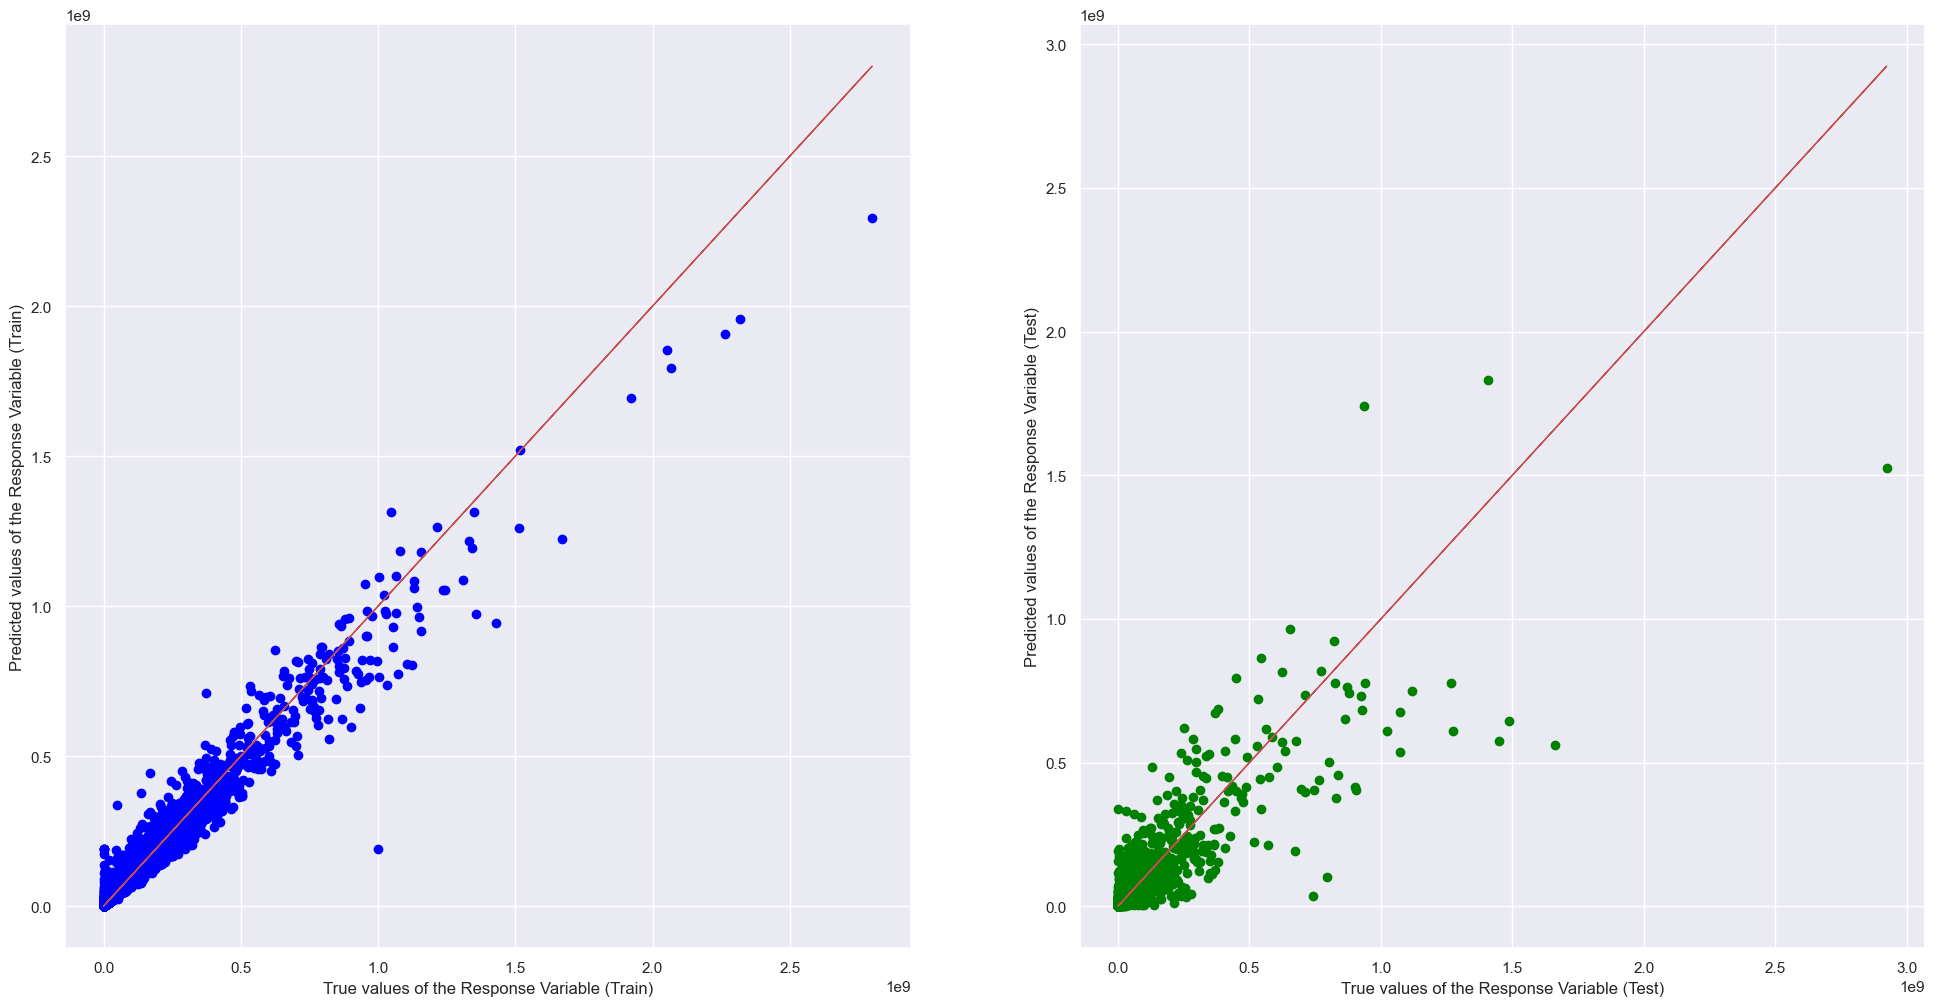

In [887]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame and "revenue" is the target variable
X = sievedtmdbdata[['budget', 'vote_count', 'first_genre', 'original_language']]
y = sievedtmdbdata['revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['budget', 'vote_count']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['first_genre', 'original_language'])])

# Preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
print('Train Metrics:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 Score:', r2_score(y_train, y_train_pred))

print('\nTest Metrics:')
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('R2 Score:', r2_score(y_test, y_test_pred))

# Visualize the results
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()